# Example Post Processing

#### Ben Smith
#### 18/08/2022


This workbook aims to provide a range of examples for the different functions within the Post Simulation Functions file.

In [1]:
import SHETRAN_Post_Simulation_Functions as sps

## shetran_obj_functions

This function can be used for calculating objective functions on SHETRAN outputs. These currently all use the regular discharge files, but should be updated to take data from the H5 file.

In [23]:
pyramid = "C:/Users/nbs65/Newcastle University/PYRAMID - General/WP3/02 SHETRAN Simulations/"

simulation_periods = {"spinup": ['1990-01-01', "1999-12-31"],
                      "calibration": ['2000-01-01', "2009-12-31"],
                      "validation": ['2010-01-01']}

metrics={}

for p in simulation_periods.keys():

    metrics[p] = sps.shetran_obj_functions(
        regular_simulation_discharge_path=pyramid + "09_Tyne_at_Newcastle_03"
                                                    "/output_Tyne_at_Newcastle_discharge_sim_regulartimestep.txt",
        recorded_discharge_path=pyramid + "CAMELS_GB_hydromet_timeseries_23001_19701001-20150930.csv",
        recorded_date_discharge_columns=["date", "discharge_vol"],
        start_date='01-01-1990', period=simulation_periods[p],
        return_flows=True, return_period=True)

1.15% of comparison data are NA
0.0% of comparison data are NA
0.0% of comparison data are NA


In [24]:
for k in metrics.keys():
    print(k, ":")
    print(metrics[k].keys())

print("--- NSE -------------------------------------------------------")

print(metrics["calibration"]["NSE"])
print(metrics["calibration"]["KGE"])

spinup :
dict_keys(['NSE', 'KGE', 'RMSE', 'PBias', 'period', 'flows'])
calibration :
dict_keys(['NSE', 'KGE', 'RMSE', 'PBias', 'period', 'flows'])
validation :
dict_keys(['NSE', 'KGE', 'RMSE', 'PBias', 'period', 'flows'])
--- NSE -------------------------------------------------------
[0.77]
[[0.74]
 [0.91]
 [1.12]
 [1.21]]


#### Plot the flows

These can be taken from the output of shetran_obj_functions()

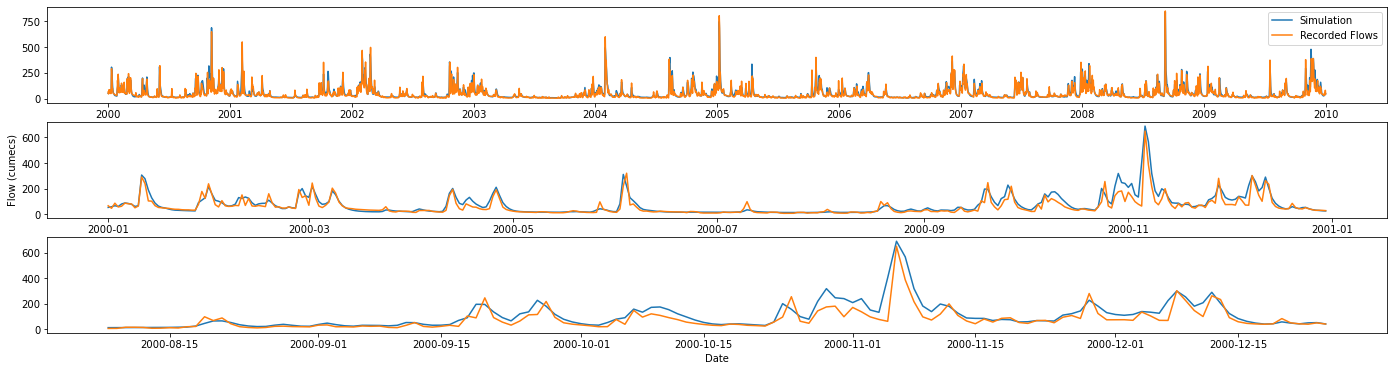

In [75]:
import matplotlib.pyplot as plt

metrics["calibration"]["flows"].head()

plt.rcParams["figure.figsize"] = (24,6)

plt.subplot(3,1,1)
plt.plot(metrics["calibration"]["flows"].index, metrics["calibration"]["flows"]["flow"], label="Simulation")
plt.plot(metrics["calibration"]["flows"].index, metrics["calibration"]["flows"]["discharge_vol"], label="Recorded Flows")
plt.legend()

plt.subplot(3,1,2)
plt.plot(metrics["calibration"]["flows"].index[:365], metrics["calibration"]["flows"]["flow"][:365], label="Simulation")
plt.plot(metrics["calibration"]["flows"].index[:365], metrics["calibration"]["flows"]["discharge_vol"][:365], label="Recorded Flows")
plt.ylabel("Flow (cumecs)")

plt.subplot(3,1,3)
plt.plot(metrics["calibration"]["flows"].index[220:360], metrics["calibration"]["flows"]["flow"][220:360], label="Simulation")
plt.plot(metrics["calibration"]["flows"].index[220:360], metrics["calibration"]["flows"]["discharge_vol"][220:360], label="Recorded Flows")

plt.xlabel("Date")

plt.show()
